2017-01-07: 3
Progress: 0.04% (1/2433)
2017-01-09: 2
Progress: 0.08% (2/2433)
2017-01-11: 3
Progress: 0.12% (3/2433)
2017-01-16: 2
Progress: 0.16% (4/2433)
2017-01-24: 3
Progress: 0.21% (5/2433)
2017-02-06: 4
Progress: 0.25% (6/2433)
2017-02-28: 4
Progress: 0.29% (7/2433)
2017-03-01: 5
Progress: 0.33% (8/2433)
2017-03-02: 8
Progress: 0.37% (9/2433)
2017-03-03: 3
Progress: 0.41% (10/2433)
2017-03-04: 4
Progress: 0.45% (11/2433)
2017-03-05: 6
Progress: 0.49% (12/2433)
2017-03-06: 18
Progress: 0.53% (13/2433)
2017-03-07: 8
Progress: 0.58% (14/2433)
2017-03-08: 3
Progress: 0.62% (15/2433)
2017-03-09: 5
Progress: 0.66% (16/2433)
2017-03-10: 4
Progress: 0.70% (17/2433)
2017-03-11: 8
Progress: 0.74% (18/2433)
2017-03-12: 4
Progress: 0.78% (19/2433)
2017-03-13: 4
Progress: 0.82% (20/2433)
2017-03-14: 2
Progress: 0.86% (21/2433)
2017-03-15: 6
Progress: 0.90% (22/2433)
2017-03-16: 4
Progress: 0.95% (23/2433)
2017-03-18: 3
Progress: 0.99% (24/2433)
2017-03-19: 2
Progress: 1.03% (25/2433)
2017-03-

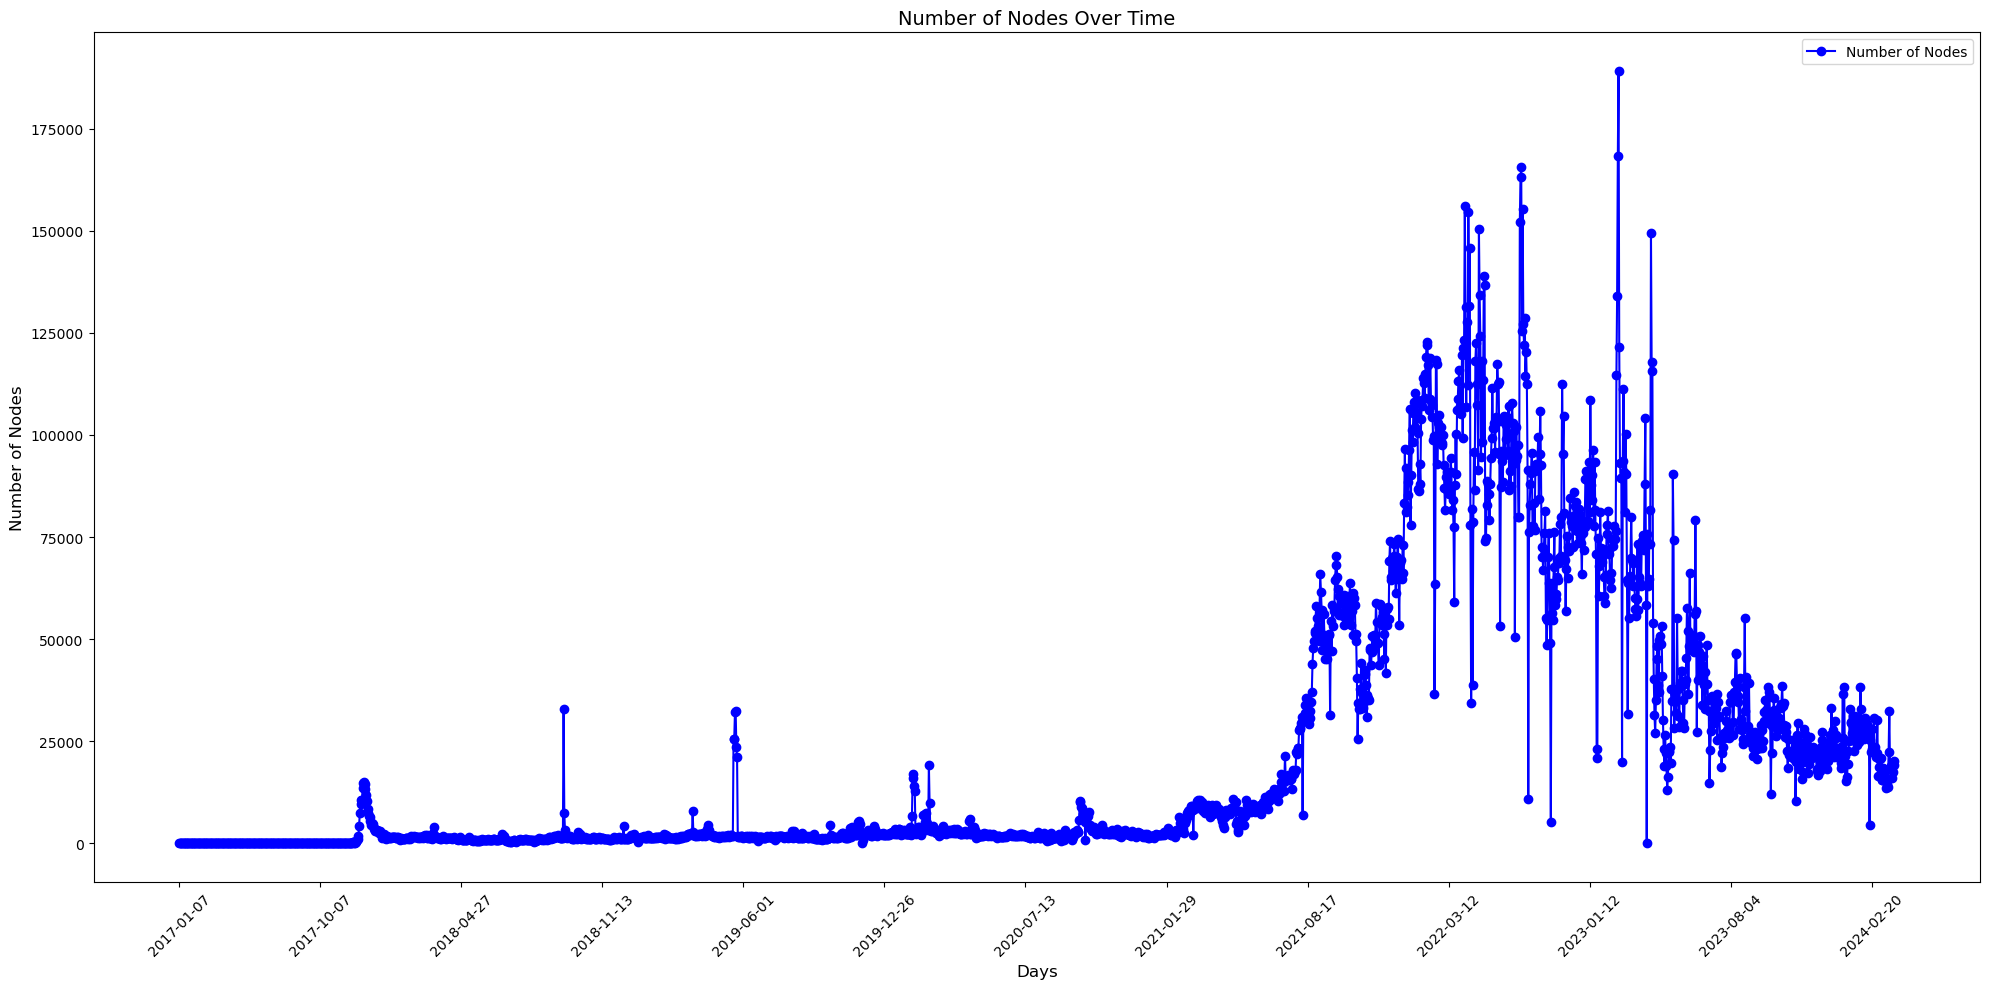

In [2]:
import os
import pandas as pd
import hypernetx as hnx
import matplotlib.pyplot as plt
import json

# Define the input directory for labeled files
labeled_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out_2017_2024'

# Define the output file paths
output_file_csv = r'/home/prio/loc_project/Mini_2_ERC_721/new_csv_data/num_nodes_per_day_2017.csv'
output_file_json = r'/home/prio/loc_project/Mini_2_ERC_721/processed_files_nodes_2017.json'

# Create the output directory if it doesn't exist
output_dir = os.path.dirname(output_file_csv)
os.makedirs(output_dir, exist_ok=True)

# Load processed files data
if os.path.exists(output_file_json):
    with open(output_file_json, 'r') as f:
        processed_files = json.load(f)
else:
    processed_files = {}

# Initialize a list to store the number of nodes for each day
num_nodes_per_day = []

# Get the list of files to process
csv_files = sorted([f for f in os.listdir(labeled_dir) if f.endswith('.csv')])

# Process each CSV file in the labeled directory
for i, filename in enumerate(csv_files):
    if filename in processed_files:
        print(f"Skipping already processed file: {filename}")
        continue

    file_path = os.path.join(labeled_dir, filename)
    
    df = pd.read_csv(file_path)
    
    # Initialize a dictionary to store the hyperedges for the current day
    hyperedges = {}
    
    # Group by 'tokenAddressLabel' to create hyperedges
    for token, group in df.groupby('tokenAddressLabel'):
        hyperedges[token] = set(group['fromLabel']).union(set(group['toLabel']))
    
    # Create the hypergraph for the current day
    H = hnx.Hypergraph(hyperedges)
    
    # Get the number of nodes in the current hypergraph
    num_nodes = len(H.nodes)
    edge_name = filename.replace('.csv', '')
    num_nodes_per_day.append((edge_name, num_nodes))
    
    # Save the processed file information
    processed_files[filename] = num_nodes
    
    # Print the number of nodes for the current day
    print(f"{edge_name}: {num_nodes}")
    
    # Print progress
    progress = (i + 1) / len(csv_files) * 100
    print(f"Progress: {progress:.2f}% ({i + 1}/{len(csv_files)})")

# Save the processed files data to a JSON file
with open(output_file_json, 'w') as f:
    json.dump(processed_files, f, indent=4)

# Save the calculated data to a CSV file
df_output = pd.DataFrame(num_nodes_per_day, columns=['Day', 'Number of Nodes'])
df_output.to_csv(output_file_csv, index=False)

# Sort the number of nodes by day
num_nodes_per_day.sort()

# Extract the days and corresponding number of nodes
days = [day for day, _ in num_nodes_per_day]
num_nodes = [nodes for _, nodes in num_nodes_per_day]

# Plot the number of nodes over time with improved readability
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days, num_nodes, marker='o', linestyle='-', color='b', label='Number of Nodes')

# Set x-axis labels every 200 days
step_size = 200  # Set the step size for x-axis labels
selected_indices = list(range(0, len(num_nodes), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels
plt.xticks(
    ticks=selected_indices,
    labels=[days[i] for i in selected_indices],  # Format the date labels
    rotation=45,
    fontsize=10
)

# Set labels and title
plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of Nodes', fontsize=12)
plt.title('Number of Nodes Over Time', fontsize=14)

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()
